In [6]:
# Jordan Marshall - 18256716 | Marcin Sek - 18254187
# [Runs without error]
# [Link to original code if used]

# TODO:
#   Name Axis on graphs
#   Name correlation graph
#   Separate code into cells
#   Traditional MLP == no Dropout 2 layers
#   Engineer bad results

Glass Dataset
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


<AxesSubplot:title={'center':'Glass Type'}, ylabel='Frequency'>

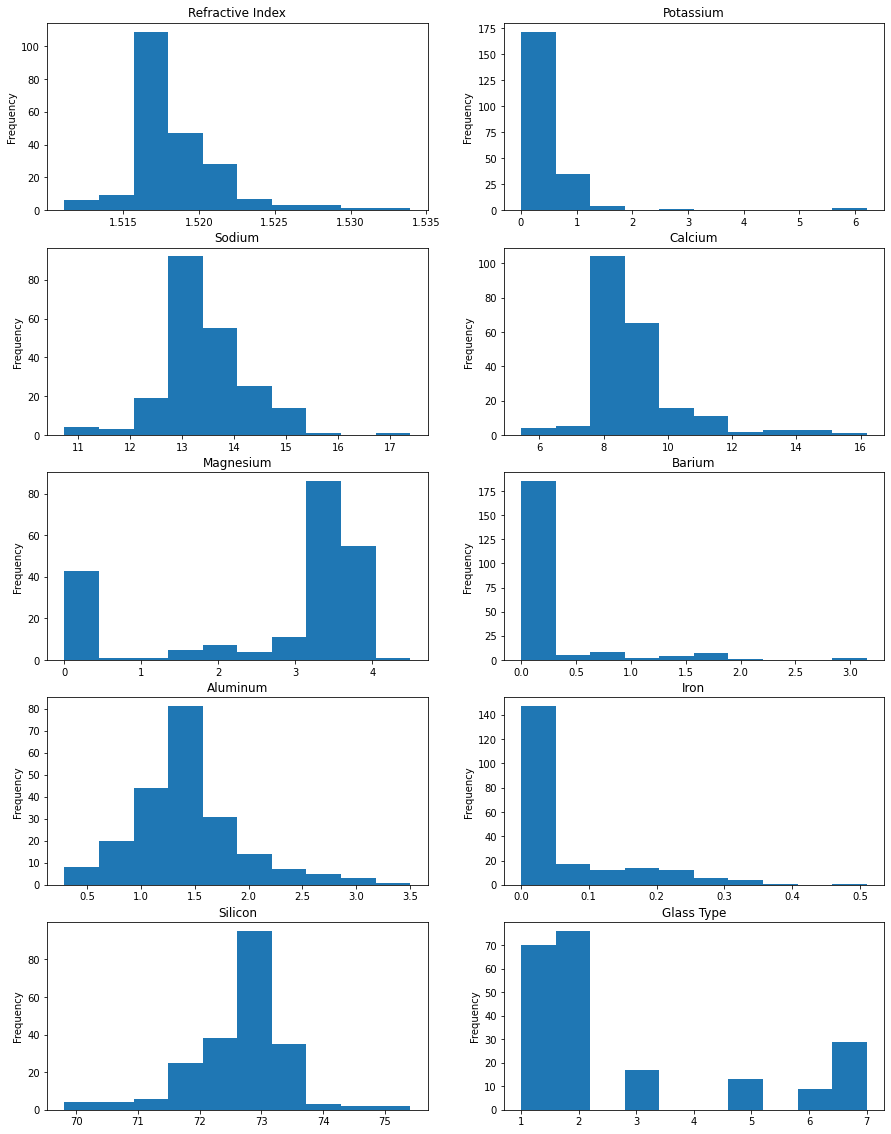

In [7]:
from pandas import read_csv
import matplotlib.pyplot as plt

# load the dataset
path = 'glass.csv'
df = read_csv(path, header=0)
print("Glass Dataset")
print(df)

# Setup plot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Add graphs to plot
df.RI.plot.hist(ax=axes[0,0], title="Refractive Index")
df.Na.plot.hist(ax=axes[1,0], title="Sodium")
df.Mg.plot.hist(ax=axes[2,0], title="Magnesium")
df.Al.plot.hist(ax=axes[3,0], title="Aluminum")
df.Si.plot.hist(ax=axes[4,0], title="Silicon")
df.K.plot.hist(ax=axes[0,1], title="Potassium")
df.Ca.plot.hist(ax=axes[1,1], title="Calcium")
df.Ba.plot.hist(ax=axes[2,1], title="Barium")
df.Fe.plot.hist(ax=axes[3,1], title="Iron")
df.Type.plot.hist(ax=axes[4,1], title="Glass Type")

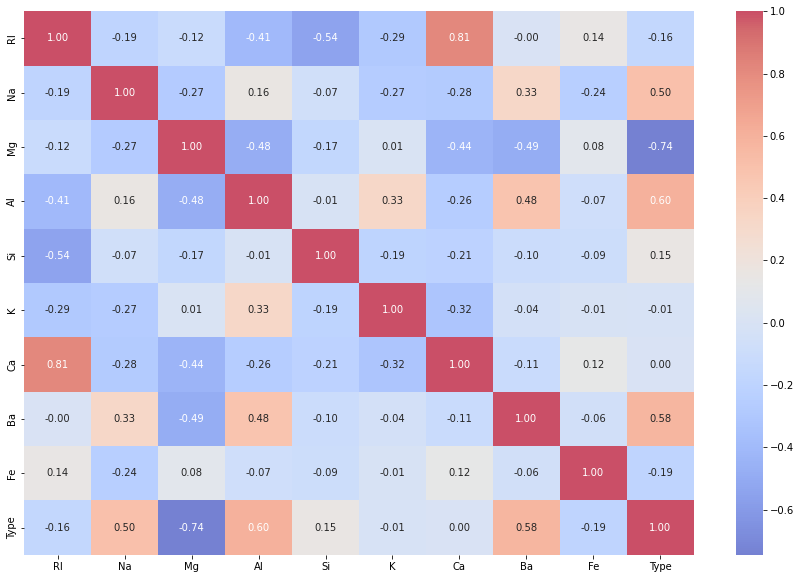

In [8]:
import seaborn as sns

# Display correlation matrix for dataset
corr_mat=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, fmt='.2f', alpha=0.7, cmap='coolwarm')
plt.show()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 200)               2000      
_________________________________________________________________
dense_40 (Dense)             (None, 80)                16080     
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 648       
Total params: 18,728
Trainable params: 18,728
Non-trainable params: 0
_________________________________________________________________


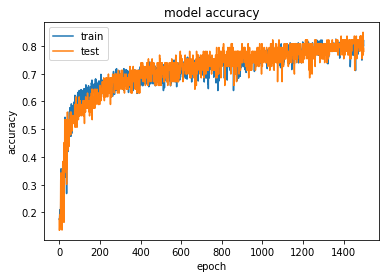

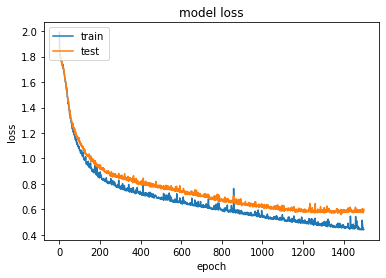

Test Accuracy: 0.826
Predicted: [[0. 0. 1. 0. 0. 0. 0. 0.]] (class=2)


In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import warnings
warnings.filterwarnings('ignore')

from numpy import argmax
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import normalize, to_categorical

# Print statistics for dataset
df.describe()

# Checks for null entries in dataset 
df.isna().sum()

# Checks for duplicate entries in dataset 
df[df.duplicated()]

# Drop duplicate entries in dataset
df.drop_duplicates(keep='last',inplace=True)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
X = normalize(X)

# encode strings to integer
y = y.astype('int32')

# Class balancing
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

# Convert to catagorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(200, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(80, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='softmax'))

# compile the model
adam = Adam()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, batch_size=32, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))
